# Week 1: Day 2 AM // Classification Concepts

In [14]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import os
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [126]:
# import some data to play with
iris = datasets.load_wine()
X = iris.data
y = iris.target

## Binary Classification

In [144]:
X_binary = X[59:,:]
y_binary = (y[59:]>1)*1

In [145]:
y_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

In [165]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=200, tol=1e-3, random_state=42,loss='log')
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=200,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## Performance Evaluation

In [166]:
y_test_pred = sgd_clf.predict(X_test)
y_test_scores = sgd_clf.predict_proba(X_test)

In [167]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[12, 12],
       [ 3,  9]])

In [168]:
from sklearn.metrics import precision_score, recall_score

print("Precision score: {0}".format(precision_score(y_test, y_test_pred)))
print("Recall score: {0}".format(recall_score(y_test, y_test_pred)))

Precision score: 0.42857142857142855
Recall score: 0.75


In [169]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_scores[:,1])

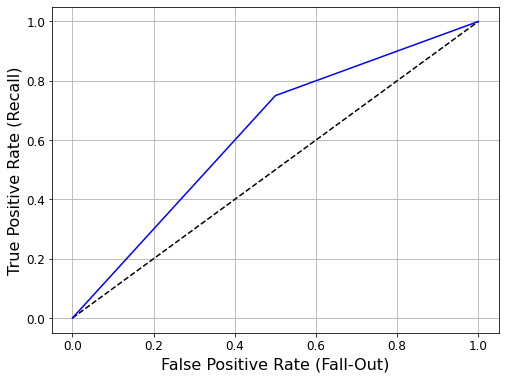

In [170]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    #plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown
    plt.plot(fpr, tpr,color='b')

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
#plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

## Multi-class Classification